# Dimensionality Reduction and Clustering

For this assignment we will use the MNIST data set. It contains 70,000 images of handwritten letters. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

## Use Principle Component Analysis (PCA) to reduce dimensionality


For this assigntment we will use PCA to analyze the MNIST data set. PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. Since the MNIST data set has 70000 dimentions using PCA will allow us to reduce the dementionality to the 2 most important variables. We will be able to explore and visualize the data more clearly. 

In [3]:
print(X.shape)

(70000, 784)


In [4]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA


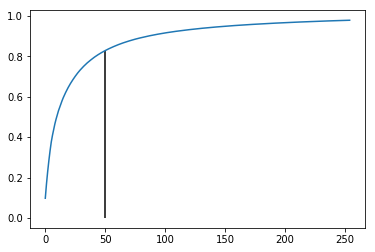

In [5]:

pca = PCA(n_components=255)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[50],x=50)

This graph uses the elbow method and shows us that 50 components is the optimal number of components so we will update our PCA model. 

Text(0.5,0,'2nd Component')

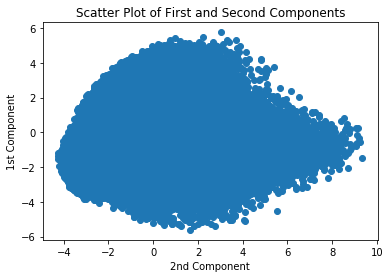

In [6]:
#scatter plot of the first 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('Scatter Plot of First and Second Components')
plt.ylabel('1st Component')
plt.xlabel('2nd Component')

The scatter plot shows us how spread out the data are in the 2 main projections. It appears that the first component is more dense at the begining and that the second component is more equally spread. 

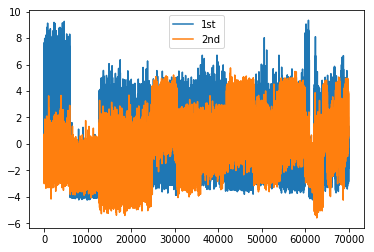

In [7]:
plt.plot(X_pca[:,0], label = '1st')
plt.plot(X_pca[:,1], label = '2nd')
plt.legend()

This graph shows the pca of component 1 and component 2 across all 70,000 images and it confirms the intuition of the previous graph. 

Typically, PCA is used when you have too many features to analyze the problem properly. Additional features can increase the variance in the data but it can also lead to over fitting and auto correlation. PCA is method that allows you to pick the most important combinations of features. A draw back to PCA is that it reduces the variance in the data and you are subject to losing intuition. 

For this problem with the MNIST data set, PCA is useful because intuition isn't that important. However, if you are trying to make predictions you would want to know the most important features instead of letting PCA automatically choose them. 

Text(0.5,1,'Handwritten Digit')

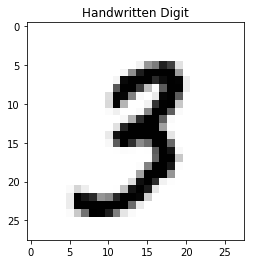

In [8]:
plt.imshow(X[21014].reshape((28,28)), cmap = 'Greys')
plt.title('Handwritten Digit')

In [9]:
pca = PCA(n_components = 50)
X_pca = pca.fit_transform(X)
compressed_X = pca.inverse_transform(X_pca)

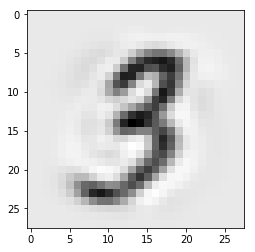

In [10]:
plt.imshow(compressed_X[21014].reshape((28,28)), cmap = 'Greys')

Compressing the image using PCA and replotting the image yeilds a similar but blurry result. Adding more components to the PCA would most likely increase the clarity of the image. 

## t-SNE

Now we will plot the first 2 components using t-SNE

In [11]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

In [12]:
#t-SNE with Perplexity 5 and interations 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.037s...
[t-SNE] Computed neighbors for 10000 samples in 7.957s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.104361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.807671
[t-SNE] Error after 1000 iterations: 1.921398


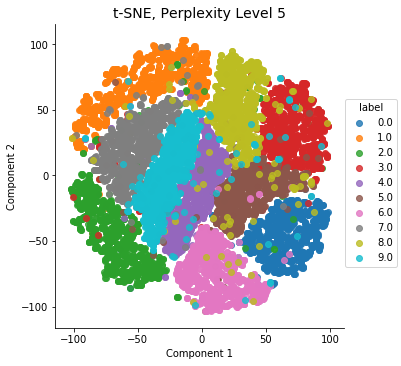

In [13]:
df_tsne = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("t-SNE, Perplexity Level 5", fontsize = 14)
plt.show()

We can see that the clusters are much clearer here than they are in the PCA model. Each component cluster seems to be separated clearly whereas the PCA model showed the components overlapping. 

## Robustness Checks
Now we will try adjusting the Perplexity, Iterations, and Learning rate to see how robust the t-SNE model is

In [14]:
# t -SNE with Perplexity 25 and iterations 1000

tsne_25 = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
tsne_25_results = tsne_25.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.034s...
[t-SNE] Computed neighbors for 10000 samples in 10.123s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.671310
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.718109
[t-SNE] Error after 1000 iterations: 1.791816


In [39]:
#t-sne with perplexity 100 and iterations 1000

tsne_100 = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
tsne_100_results = tsne_100.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 10.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.189205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.971832
[t-SNE] Error after 1000 iterations: 1.507660


In [37]:
#t-SNE with Perplexity 50 and iterations 1000

tsne_50 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_50_results = tsne_50.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.029s...
[t-SNE] Computed neighbors for 10000 samples in 10.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.919888
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.982254
[t-SNE] Error after 1000 iterations: 1.667440


In [16]:
#t-SNE with perplexity 5 and iterations 5000

tsne_it = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000, learning_rate=200)
tsne_it_results = tsne_it.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.032s...
[t-SNE] Computed neighbors for 10000 samples in 7.646s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.104361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.889153
[t-SNE] Error after 5000 iterations: 1.558848


In [19]:
#t-SNE with perplexity 5 and iterations 10000
tsne_it2 = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=10000, learning_rate=200)
tsne_it2_results = tsne_it2.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.029s...
[t-SNE] Computed neighbors for 10000 samples in 7.568s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.104361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.036919
[t-SNE] Error after 5000 iterations: 1.570698


In [21]:
#t-SNE with perplexity 5 and iterations 1000 and Learning Rate 1000

tsne_lr = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=1000)
tsne_lr_results = tsne_lr.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 8.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.104361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.562996
[t-SNE] Error after 1000 iterations: 1.890100


In [22]:
#t-SNE with perplexity 5 and iterations 1000 and Learning Rate 10000

tsne_lr2 = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=10000)
tsne_lr2_results = tsne_lr2.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.037s...
[t-SNE] Computed neighbors for 10000 samples in 7.531s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.104361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.791046
[t-SNE] Error after 1000 iterations: 1.955069


### Perplexity Robustness Check

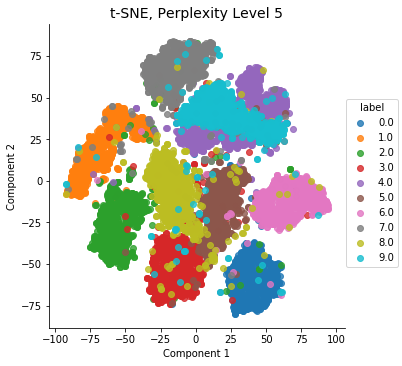

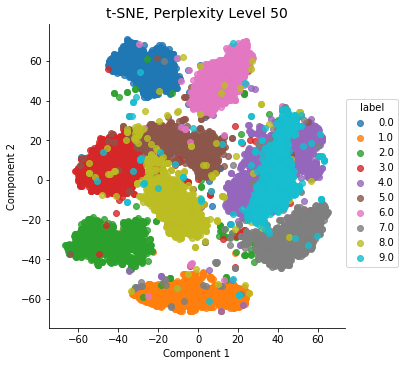

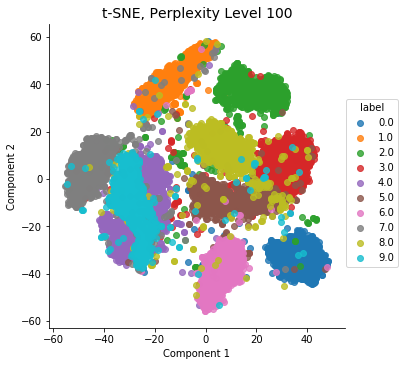

In [40]:
df_tsne_25 = pd.DataFrame(tsne_25_results, columns=['Component 1', 'Component 2'])
df_tsne_25['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne_25, hue='label',  fit_reg=False)
ax = plt.gca()
ax.set_title("t-SNE, Perplexity Level 5", fontsize = 14)
plt.show()

df_tsne_50 = pd.DataFrame(tsne_50_results, columns=['Component 1', 'Component 2'])
df_tsne_50['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne_50, hue='label', fit_reg=False)
ax_50 = plt.gca()
ax_50.set_title("t-SNE, Perplexity Level 50", fontsize = 14)
plt.show()

df_tsne_100 = pd.DataFrame(tsne_100_results, columns=['Component 1', 'Component 2'])
df_tsne_100['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne_100, hue='label', fit_reg=False)
ax_100 = plt.gca()
ax_100.set_title("t-SNE, Perplexity Level 100", fontsize = 14)
plt.show()

The clusters move around quite a bit so we can see that t-SNE is not very robust to changes in perplexity

### Iteration Robustness Check

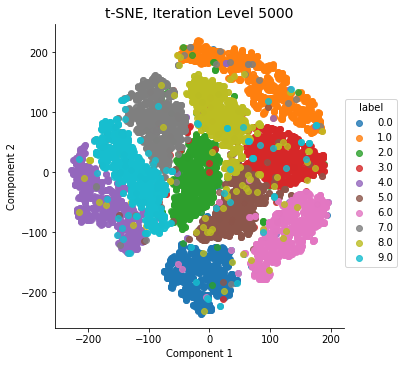

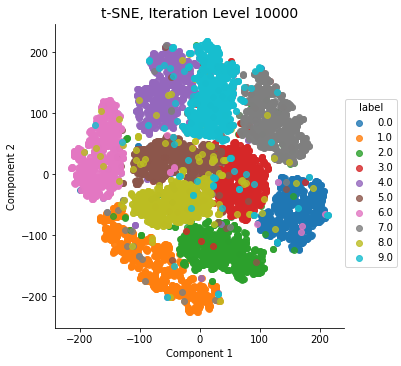

In [36]:
df_tsne_it = pd.DataFrame(tsne_it_results, columns=['Component 1', 'Component 2'])
df_tsne_it['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne_it, hue='label', fit_reg=False)
ax_it = plt.gca()
ax_it.set_title("t-SNE, Iteration Level 5000", fontsize = 14)
plt.show()


df_tsne_it2 = pd.DataFrame(tsne_it2_results, columns=['Component 1', 'Component 2'])
df_tsne_it2['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne_it2, hue='label', fit_reg=False)
ax_it2 = plt.gca()
ax_it2.set_title("t-SNE, Iteration Level 10000", fontsize = 14)
plt.show()

The clusters seem to just rotate in after this robustness check but the model is still not very robust

### Learning Rate Robustness Check

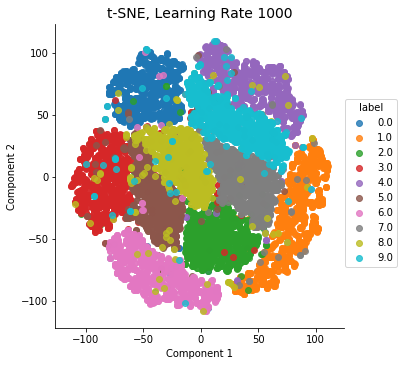

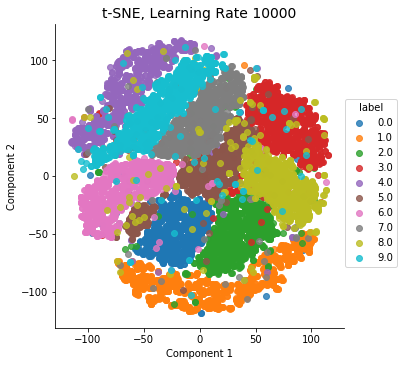

In [35]:
df_tsne_lr = pd.DataFrame(tsne_lr_results, columns=['Component 1', 'Component 2'])
df_tsne_lr['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne_lr, hue='label', fit_reg=False)
ax_lr = plt.gca()
ax_lr.set_title("t-SNE, Learning Rate 1000", fontsize = 14)
plt.show()

df_tsne_lr2 = pd.DataFrame(tsne_lr2_results, columns=['Component 1', 'Component 2'])
df_tsne_lr2['label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne_lr2, hue='label', fit_reg=False)
ax_lr2 = plt.gca()
ax_lr2.set_title("t-SNE, Learning Rate 10000", fontsize = 14)
plt.show()

The model seems to be the most robust to changes in the learning rate but it is still not completely robust

# K-Means Clustering


In [48]:
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, homogeneity_score

I chose to use k=10 because the MNIST dataset has 10 classes - digits 0 through 9

In [43]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(X[rows[:n_select],:])
sk_clusters = kmeans.predict(X)

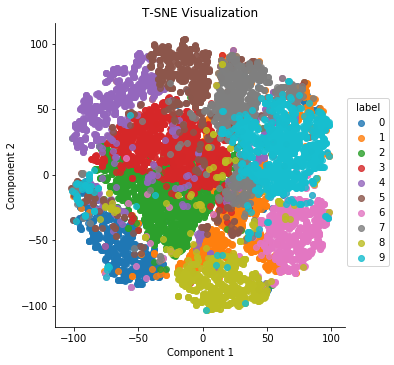

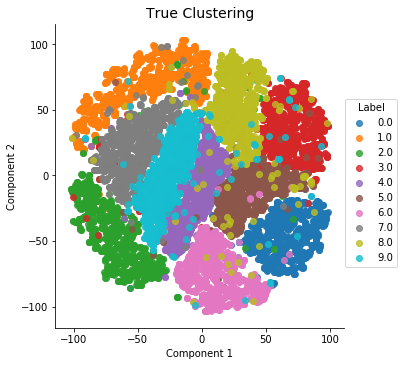

In [44]:
cluster_tsne = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
cluster_tsne['label'] = sk_clusters[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=cluster_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title('T-SNE Visualization')

# True Clustering
df_tsne = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
df_tsne['Label'] = y[rows[:n_select]]
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne, hue='Label', fit_reg=False)
ax = plt.gca()
ax.set_title("True Clustering", fontsize = 14)
plt.show()

We can see that some of the  clusterin is the same while other clusters changed significantly 

### Evaluating the Effectiveness of the Model

We can evaluate the model using 2 metrics. First the silhouette score and second  the homogeneity score. The closer the silhouette score the better and the homogeneity score should be around 0.5.

In [46]:
print('t-SNE Silhouette Score:')
print(silhouette_score(cluster_tsne[['Component 1', 'Component 2']], sk_clusters[rows[:n_select]], metric='euclidean'))
print('True Clustering Silhouette Score:')
print(silhouette_score(df_tsne[['Component 1', 'Component 2']], y[rows[:n_select]], metric='euclidean'))

t-SNE Silhouette Score:
0.14387663
True Clustering Silhouette Score:
0.25116652


In [50]:
print('Homogeneity Score:')
print(homogeneity_score(y[rows[:n_select]], kmeans.labels_))



Homogeneity Score:
0.5021211559109408


The Silhouette scores for both models are positive so they will both work. The True clustering score is better than the t-SNE clustering. Additionally the homogeneity is 0.502 which is very close to 0.5. 

### Scaling the Data

Since the data are scaled the same way before we started the analysis we do not need to scale our data to do K-means clustering.

# Hierarchial Clustering

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import shuffle

In [52]:
X_full = pd.DataFrame(X)
Xsub = X_full.sample(n = 2500)


Text(0,0.5,'Heirarchy Level')

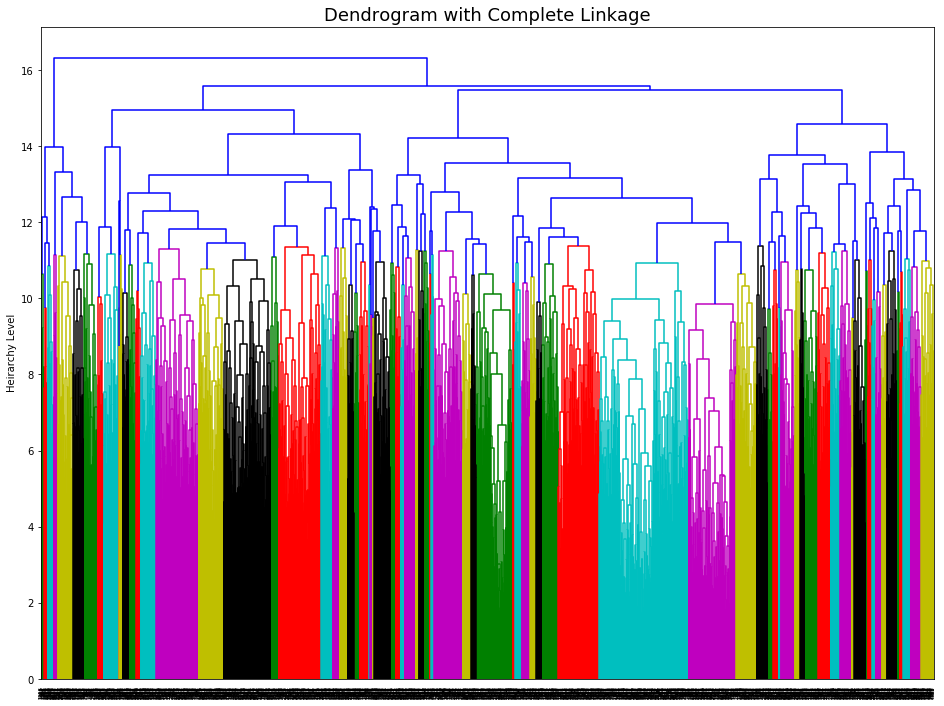

In [53]:
plt.figure(figsize=(16,12))
Z = linkage(Xsub, 'complete')
dgram_c = dendrogram(Z)
plt.title('Dendrogram with Complete Linkage', fontsize = 18)
plt.ylabel('Heirarchy Level')

It seems like anywere bettween 9 and 12 clusters would work the best for this data set. This further proves our assumption of 10 is valid. 

## Dendrograms with Different Linking Methods

Text(0,0.5,'Heirarchy Level')

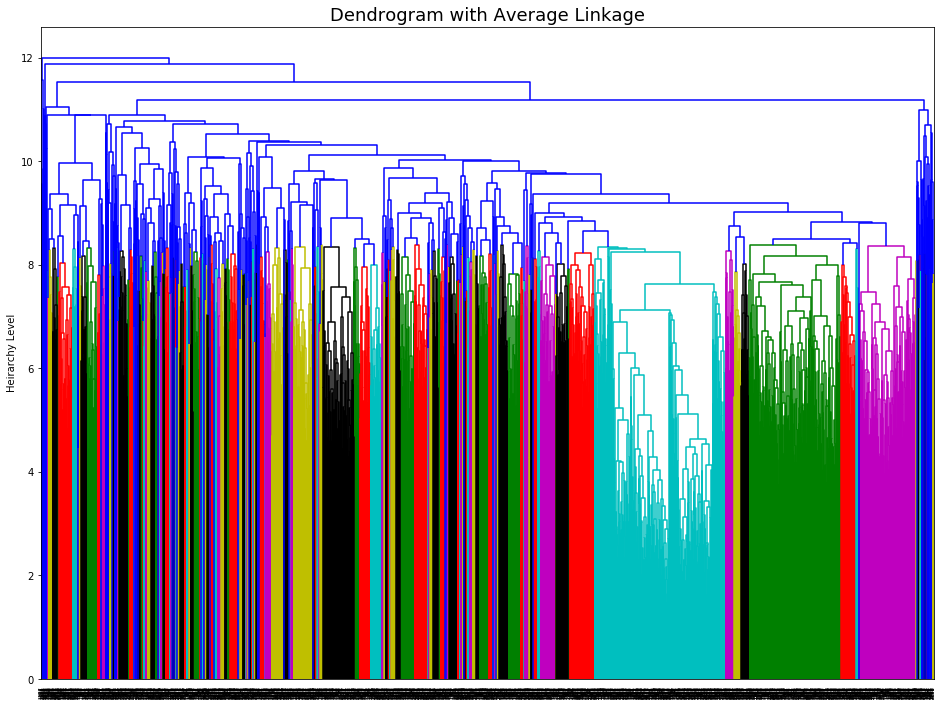

In [54]:
plt.figure(figsize=(16,12))
A = linkage(Xsub, 'average')
dgram_a = dendrogram(A)
plt.title('Dendrogram with Average Linkage', fontsize = 18)
plt.ylabel('Heirarchy Level')

Text(0,0.5,'Heirarchy Level')

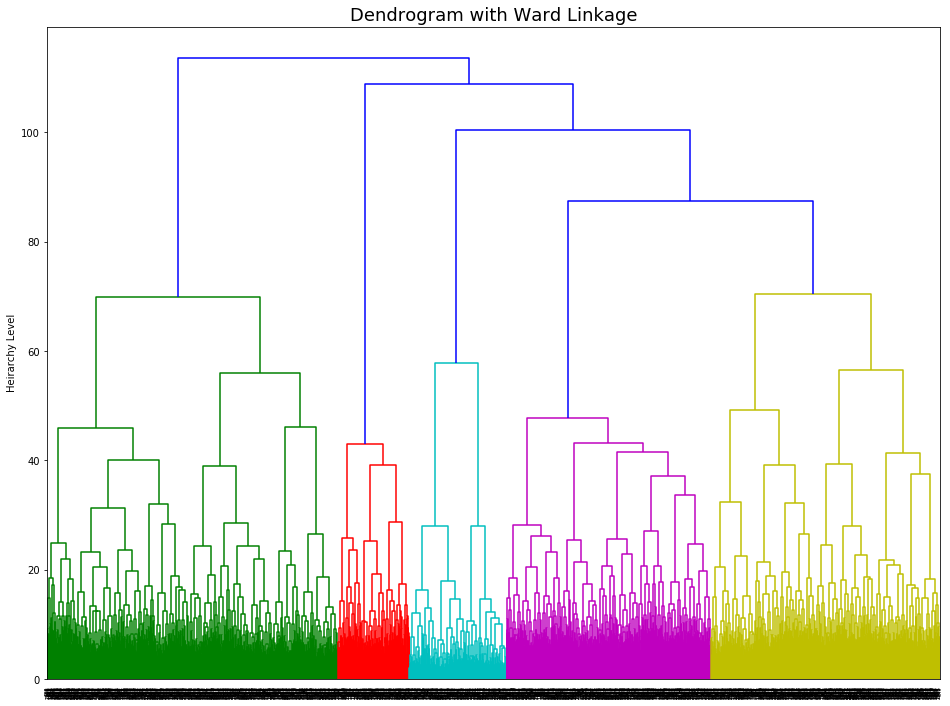

In [55]:
plt.figure(figsize=(16,12))
W= linkage(Xsub, 'ward')
dgram_w = dendrogram(W)
plt.title('Dendrogram with Ward Linkage', fontsize = 18)
plt.ylabel('Heirarchy Level')

After trying different linking methods, we found that complete and ward methods are the best linking methods. They both produce a more organized hierarchy so we can clearly determine how many clusters is best. 

# Conclusion

We have shown how the use the tools of PCA, t-SNE, K-means clustering, and hierachial clustering to analyze the MNIST image data set. All of these are usefull tools that can be scaled to larger data sets that will allow reduce the dimensionality of our data and make better analysis. 